In [1]:
#sandbox =
#PATH_DATA = '/data/sandboxes/'+sandbox+'/data/data/'

PATH_DATA = '/content/drive/MyDrive/Colab_Notebooks/8.- Workshops/DiabetesData/'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




# Workshop de Python

Cargamos datasets con información de admisiones a hospitales de enfermos de diabetes. El objetivo es, una vez limpiado el dataset, estudiarlo para extraer el máximo número de insights de los datos.



## Información sobre los datos

* Encounter ID 
    - ID único de la admisión de un paciente
* Patient number 
    - ID único de paciente
* Race 
    - Raza
* Gender
    - Sexo
* Age
    - Edad (en intervalos de 10 años)
    
* Weight
    - Peso en libras
* Admission type 
    - Identificador del tipo de admisión 
* Discharge disposition
    - Identificador del tipo de alta 
* Admission source
    - Identificador de la fuente de admisión 
* Time in hospital 
    - Número de días que han pasado entre admission y discharge (admisión y alta)
* Payer code
    - Identificador del código de pago
* Medical specialty
    - Identificador de la especialidad médica donde es ingresado el paciente
* Number of lab procedures 
    - Número de análisis en laboratorio que se han llevado a cabo durante el ingreso del paciente
* Number of procedures 
    - Número de procedimientos (diferentes a los análisis en laboratorio) que se han llevado a cabo durante el ingreso del paciente
* Number of medications
    - Número de nombres de medicamentos distintos que se hayan administrado al paciente durante su ingreso
* Number of outpatient visits
    - Número de visitas como paciente externo (no ingresado, por ejemplo) que ha tenido el paciente durante el año antes de esta admisión
* Number of emergency
    - Numero de visitas de emergencia del paciente durante el año antes de esta admisión
* Number of inpatient visits 
    - Número de visitas en las que ha estado ingresado el paciente durante el año antes de esta admisión
* Diagnosis 1 
    - Diagnóstico primario (codificado como los tres primeros dígitos del ICD9)
    - Descripción de los códigos ICD9: http://icd9.chrisendres.com/index.php?action=contents
* Diagnosis 2 
    - Diagnóstico secundario (codificado como los tres primeros dígitos del ICD9)
    - Descripción de los códigos ICD9: http://icd9.chrisendres.com/index.php?action=contents
* Diagnosis 3 
    - Diagnóstico adicional (codificado como los tres primeros dígitos del ICD9)
    - Descripción de los códigos ICD9: http://icd9.chrisendres.com/index.php?action=contents
* Number of diagnoses 
    - Número de diagnósticos que se han introducido al sistema
* Glucose serum test result 
    - Indica el rango del resultado de la prueba de glucosa, o si no se llevó a cabo la prueba. Valores: “>200,” “>300,” “normal,” y “none” si no se realizó la prueba
* A1c test result
    - Indica el rango del resultado de la prueba de hemoglobina A1c, o si no se llevó a cabo la prueba. Valores: “>8” si el resultado fue mayor del 8%, “>7” si el resultado fue mayor del 7% pero menor del 8%, “normal” si el resultado fue menor del 7%, y “none” si no se realizó la prueba.
* Change of medications 
    - Indica si ha habido un cambio en la medicación para la diabetes (tanto en la dosis como en el propio medicamento)
* Diabetes medications 
    - Indica si ha el paciente toma medicación para la diabetes
* 24 features for medications
    - Para los nombres genéricos de los medicamentos metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiridepioglitazone, metformin-rosiglitazone, y metforminpioglitazone, la variable indica si se prescribió o no el medicamento durante la visita del paciente
    - Valores: “up” si se subió la dosis durante la visita, “down” si se bajó la dosis, “steady” si la dosis no cambió, y “no” si no se prescribió el medicamento
* Readmitted 
    - Indica cuántos días ha tardado el paciente en volver al hospital y ser readmitido. Valores: “<30” si el paciente fue readmitido en menos de 30 días, “>30” si el paciente fue readmitido en más de 30 días, y “No” si el paciente no ha sido readmitido



## Cargar librerías

In [3]:
%matplotlib inline

import re
import random
from collections import Counter

import pandas as pd
pd.set_option('display.max_colwidth', -1)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest
sns.set(color_codes=True)

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import  roc_curve, auc, silhouette_score, recall_score, precision_score, confusion_matrix, make_scorer
#from sklearn.grid_search import GridSearchCV, ParameterGrid
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.cluster import KMeans

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  




## Lectura de datos

In [4]:
#diabetes = spark.read.csv(PATH_DATA+'diabetic_data.csv', sep=',', header=True, inferSchema=True).toPandas()
#admission_source = spark.read.csv(PATH_DATA+'admission_source_id.csv', sep=',', header=True, inferSchema=True).toPandas()
#admission_type = spark.read.csv(PATH_DATA+'admission_type_id.csv', sep=',', header=True, inferSchema=True).toPandas()
#discharge_disposition = spark.read.csv(PATH_DATA+'discharge_disposition_id.csv', sep=',', header=True, inferSchema=True).toPandas()

PATH_DATA = '/content/drive/MyDrive/Colab_Notebooks/8.- Workshops/DiabetesData/'

diabetes = pd.read_csv(PATH_DATA+'diabetic_data.csv', sep=',')#, header=True, inferSchema=True)
admission_source = pd.read_csv(PATH_DATA+'admission_source_id.csv', sep=',')#, header=True, inferSchema=True).toPandas()
admission_type = pd.read_csv(PATH_DATA+'admission_type_id.csv', sep=',')#, header=True, inferSchema=True).toPandas()
discharge_disposition = pd.read_csv(PATH_DATA+'discharge_disposition_id.csv', sep=',')#, header=True, inferSchema=True).toPandas()




### comprobar correcta lectura de los datos

In [5]:
#diabetes.head()
diabetes

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,MC,?,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,MC,?,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,MC,?,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


In [6]:
admission_source.head()

,admission_source_id,description
0,1,Physician Referral
1,2,Clinic Referral
2,3,HMO Referral
3,4,Transfer from a hospital
4,5,Transfer from a Skilled Nursing Facility (SNF)


In [7]:
admission_type

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,None
6,7,Trauma Center
7,8,Not Mapped


In [8]:
discharge_disposition.head()

,discharge_disposition_id,description
0,1,Discharged to home
1,2,Discharged/transferred to another short term hospital
2,3,Discharged/transferred to SNF
3,4,Discharged/transferred to ICF
4,5,Discharged/transferred to another type of inpatient care institution




### juntar todos los datos en el mismo DataFrame

In [9]:
diabetes_j1 = pd.merge(diabetes, admission_source, on=['admission_source_id'], how='left')
diabetes_j2 = pd.merge(diabetes_j1, admission_type, on=['admission_type_id'], how='left')
df = pd.merge(diabetes_j2, discharge_disposition, on=['discharge_disposition_id'], how='left')


In [10]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,description_x,description_y,description
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,Physician Referral,None,Not Mapped
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,Emergency Room,Emergency,Discharged to home
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,Emergency Room,Emergency,Discharged to home
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,Emergency Room,Emergency,Discharged to home
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,Emergency Room,Emergency,Discharged to home
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,MC,?,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30,Emergency Room,Emergency,Discharged/transferred to SNF
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,MC,?,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO,Transfer from a Skilled Nursing Facility (SNF),Emergency,Discharged/transferred to ICF
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,MC,?,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO,Emergency Room,Emergency,Discharged to home
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,Emergency Room,Urgent,Discharged/transferred to SNF




### estudiar las dimensiones del dataset

In [11]:
print('Dimensión dataset unificado:','\n')
print(df.shape,'\n')

Dimensión dataset unificado: 

(101766, 53) 



In [12]:
df.describe#(include='all')

<bound method NDFrame.describe of         encounter_id  patient_nbr  ... description_y                    description
0       2278392       8222157      ...  None          Not Mapped                   
1       149190        55629189     ...  Emergency     Discharged to home           
2       64410         86047875     ...  Emergency     Discharged to home           
3       500364        82442376     ...  Emergency     Discharged to home           
4       16680         42519267     ...  Emergency     Discharged to home           
...       ...              ...     ...        ...                    ...           
101761  443847548     100162476    ...  Emergency     Discharged/transferred to SNF
101762  443847782     74694222     ...  Emergency     Discharged/transferred to ICF
101763  443854148     41088789     ...  Emergency     Discharged to home           
101764  443857166     31693671     ...  Urgent        Discharged/transferred to SNF
101765  443867222     175429310    ...  Em



## Data Wrangling



### cambiar los nombres de las columnas para que cumplan buenas prácticas

In [13]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'description_x', 'description_y', 'description'],
      dtype='object')

In [14]:
df.columns = (['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'admission_source_descrip', 'admission_type_descrip', 'discharge_disposition_descrip'])

df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,admission_source_descrip,admission_type_descrip,discharge_disposition_descrip
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,Physician Referral,None,Not Mapped
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,Emergency Room,Emergency,Discharged to home
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,Emergency Room,Emergency,Discharged to home
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,Emergency Room,Emergency,Discharged to home
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,Emergency Room,Emergency,Discharged to home


In [15]:
new_col = df.columns

df.columns = [x.replace('-', '_').lower() for x in new_col ]

df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'a1cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide_metformin', 'glipizide_metformin',
       'glimepiride_pioglitazone', 'metformin_rosiglitazone',
       'metformin_pioglitazone', 'change', 'diabetesmed', 'readmitted',
       'admission_source_descrip', 'admission_type_descrip',
       'discharge_disposition_d



### estudiar el formato de las variables, ver cuáles se deberían modificar y modificarlas cuando se considere oportuno

In [16]:
#df.head()
#df.dtypes
#df.astype({'weight': 'int32'})

df["race"] = df["race"].replace('?', np.nan)
df["weight"] = df["weight"].replace('?', np.nan)#.astype(['weight': 'int32'])
df["payer_code"] = df["payer_code"].replace('?', np.nan)
df["medical_specialty"] = df["medical_specialty"].replace('?', np.nan)
df["diag_1"] = df["diag_1"].replace('?', np.nan)
df["diag_2"] = df["diag_2"].replace('?', np.nan)
df["diag_3"] = df["diag_3"].replace('?', np.nan)

#df["race"].sort_values()
#df["weight"].apply(lambda x: format(x, '0.2f'))
#df["diag_1"].apply(lambda x: format(x, '0.2f'))


# variable respuesta = reincidencia (readmitted) / ¿q factores hacen q el paciente vuelva?

In [17]:
df.dtypes[:15]

encounter_id                int64 
patient_nbr                 int64 
race                        object
gender                      object
age                         object
weight                      object
admission_type_id           int64 
discharge_disposition_id    int64 
admission_source_id         int64 
time_in_hospital            int64 
payer_code                  object
medical_specialty           object
num_lab_procedures          int64 
num_procedures              int64 
num_medications             int64 
dtype: object



### estudiar si hay registros repetidos

In [18]:
print('Hay Id de pacientes duplicados?','\n')
print(df['patient_nbr'].duplicated().any(),'\n')
print('Hay # de visita duplicados?','\n')
print(df['encounter_id'].duplicated().any(),'\n')

Hay Id de pacientes duplicados? 

True 

Hay # de visita duplicados? 

False 



In [19]:
df[df['patient_nbr'].duplicated() == True]

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,a1cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,metformin_rosiglitazone,metformin_pioglitazone,change,diabetesmed,readmitted,admission_source_descrip,admission_type_descrip,discharge_disposition_descrip
79,1070256,23043240,Caucasian,Female,[50-60),NaN,2,1,4,3,NaN,NaN,41,4,20,0,0,1,414,411,250,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30,Transfer from a hospital,Urgent,Discharged to home
81,1077924,21820806,AfricanAmerican,Male,[50-60),NaN,1,6,7,3,NaN,NaN,52,0,13,0,0,2,198,197,197,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,Emergency Room,Emergency,Discharged/transferred to home with home health service
143,2309376,41606064,Caucasian,Male,[20-30),NaN,2,1,2,2,NaN,NaN,35,0,12,0,0,1,277,250.02,753,3,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30,Clinic Referral,Urgent,Discharged to home
175,2552952,86240259,Caucasian,Female,[70-80),NaN,1,3,7,11,NaN,InternalMedicine,44,0,19,0,1,6,276,8,496,8,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,Emergency Room,Emergency,Discharged/transferred to SNF
307,3174918,5332491,Other,Female,[60-70),NaN,6,25,7,5,NaN,InternalMedicine,58,1,11,0,0,1,428,511,584,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO,Emergency Room,None,Not Mapped
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101760,443847176,50375628,AfricanAmerican,Female,[60-70),NaN,1,1,7,6,DM,NaN,45,1,25,3,1,2,345,438,412,9,None,None,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30,Emergency Room,Emergency,Discharged to home
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,MC,NaN,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30,Emergency Room,Emergency,Discharged/transferred to SNF
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,MC,NaN,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO,Transfer from a Skilled Nursing Facility (SNF),Emergency,Discharged/transferred to ICF
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,MC,NaN,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO,Emergency Room,Emergency,Discharged to home


In [20]:
df[df['patient_nbr']==23043240]

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,a1cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,metformin_rosiglitazone,metformin_pioglitazone,change,diabetesmed,readmitted,admission_source_descrip,admission_type_descrip,discharge_disposition_descrip
68,796152,23043240,Caucasian,Female,[50-60),NaN,2,1,4,2,NaN,NaN,32,3,11,0,0,0,414,424,424,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,<30,Transfer from a hospital,Urgent,Discharged to home
79,1070256,23043240,Caucasian,Female,[50-60),NaN,2,1,4,3,NaN,NaN,41,4,20,0,0,1,414,411,250,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30,Transfer from a hospital,Urgent,Discharged to home
12923,52009764,23043240,Caucasian,Female,[50-60),NaN,2,1,4,4,NaN,NaN,44,6,19,0,0,0,414,411,V45,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO,Transfer from a hospital,Urgent,Discharged to home




### estudiar si hay variables que siempre o prácticamente siempre toman el mismo valor: tomar siempre el mismo valor no aporta información al modelo

In [21]:
df.nunique().sort_values()[:15]

citoglipton                 1
examide                     1
glipizide_metformin         2
acetohexamide               2
glimepiride_pioglitazone    2
metformin_rosiglitazone     2
metformin_pioglitazone      2
change                      2
tolbutamide                 2
diabetesmed                 2
troglitazone                2
readmitted                  3
gender                      3
tolazamide                  3
glyburide                   4
dtype: int64

In [ ]:
#df.groupby("citoglipton").describe()                # 100% "No"
#df.groupby("examide").describe()                    # 100% "No"
#df.groupby("glipizide_metformin").describe()        # >99% "No" / (13) <1% "Steady"
#df.groupby("acetohexamide").describe()              # >99% "No" / (1) <1% "Steady" 
#df.groupby("glimepiride_pioglitazone").describe()   # >99% "No" / (1) <1% "Steady" 
#df.groupby("metformin_rosiglitazone").describe()    # >99% "No" / (2) <1% "Steady" 
#df.groupby("metformin_pioglitazone").describe()     # >99% "No" / (1) <1% "Steady" 
#df.groupby("change").describe()                     # (54.755) 53% "No" / (47.011) 47% "Ch" 
#df.groupby("tolbutamide").describe()                # >99% "No" / (23) <1% "Steady"

#df.describe(include='all').loc['freq']

In [22]:
# Generar DF de variables tipo objeto:

df_cat = df.select_dtypes('O')
print('Dimensión df variables tipo objeto: ', '\n',
      df_cat.shape, '\n')
df_cat.head()

Dimensión df variables tipo objeto:  
 (101766, 40) 



,race,gender,age,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,a1cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,metformin_rosiglitazone,metformin_pioglitazone,change,diabetesmed,readmitted,admission_source_descrip,admission_type_descrip,discharge_disposition_descrip
0,Caucasian,Female,[0-10),NaN,NaN,Pediatrics-Endocrinology,250.83,NaN,NaN,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,Physician Referral,None,Not Mapped
1,Caucasian,Female,[10-20),NaN,NaN,NaN,276,250.01,255,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,Emergency Room,Emergency,Discharged to home
2,AfricanAmerican,Female,[20-30),NaN,NaN,NaN,648,250,V27,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,Emergency Room,Emergency,Discharged to home
3,Caucasian,Male,[30-40),NaN,NaN,NaN,8,250.43,403,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,Emergency Room,Emergency,Discharged to home
4,Caucasian,Male,[40-50),NaN,NaN,NaN,197,157,250,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,Emergency Room,Emergency,Discharged to home


In [23]:
# Revisar qué variables tienen alta concentración de nulos:

#df_c = pd.DataFrame()
#for x in df_cat.columns:
#   print(df_c.append(df_cat[x].value_counts(normalize = True).sort_values(ascending = True)))

In [24]:
print('Dimensión Df original:','\n')
print(df.shape,'\n')

# Eliminar variables con alta concentración de nulos:

df_null = df.drop(['max_glu_serum','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide',
                   'tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone',
                   'tolazamide','examide','citoglipton','glipizide_metformin','glimepiride_pioglitazone',
                   'metformin_rosiglitazone'], axis=1)

print('Dimensión Df tras depurar vbles:','\n')
print(df_null.shape,'\n')
df_null.head()                       


Dimensión Df original: 

(101766, 53) 

Dimensión Df tras depurar vbles: 

(101766, 35) 



,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,a1cresult,metformin,glipizide,glyburide,insulin,glyburide_metformin,metformin_pioglitazone,change,diabetesmed,readmitted,admission_source_descrip,admission_type_descrip,discharge_disposition_descrip
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,No,No,No,No,No,No,No,No,NO,Physician Referral,None,Not Mapped
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,No,No,No,Up,No,No,Ch,Yes,>30,Emergency Room,Emergency,Discharged to home
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,No,Steady,No,No,No,No,No,Yes,NO,Emergency Room,Emergency,Discharged to home
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,No,No,No,Up,No,No,Ch,Yes,NO,Emergency Room,Emergency,Discharged to home
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,No,Steady,No,Steady,No,No,Ch,Yes,NO,Emergency Room,Emergency,Discharged to home




### estudiar los nulos en el dataset

In [25]:
((df_null.isnull().sum()/df_null.shape[0]*100).sort_values(ascending=False))[:10]

weight                           96.858479
medical_specialty                49.082208
payer_code                       39.557416
race                             2.233555 
diag_3                           1.398306 
diag_2                           0.351787 
diag_1                           0.020636 
discharge_disposition_descrip    0.000000 
num_procedures                   0.000000 
num_lab_procedures               0.000000 
dtype: float64

In [26]:
df_null = df_null.drop(['weight'], axis=1)

print('Dimensión Df tras depurar vbles con concentración de nulos:','\n')
print(df_null.shape,'\n')
df_null.head()


Dimensión Df tras depurar vbles con concentración de nulos: 

(101766, 34) 



,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,a1cresult,metformin,glipizide,glyburide,insulin,glyburide_metformin,metformin_pioglitazone,change,diabetesmed,readmitted,admission_source_descrip,admission_type_descrip,discharge_disposition_descrip
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,No,No,No,No,No,No,No,No,NO,Physician Referral,None,Not Mapped
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,No,No,No,Up,No,No,Ch,Yes,>30,Emergency Room,Emergency,Discharged to home
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,No,Steady,No,No,No,No,No,Yes,NO,Emergency Room,Emergency,Discharged to home
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,No,No,No,Up,No,No,Ch,Yes,NO,Emergency Room,Emergency,Discharged to home
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,No,Steady,No,Steady,No,No,Ch,Yes,NO,Emergency Room,Emergency,Discharged to home




### estudiar los outliers

In [27]:
# Generar DF de variables numericas:

df_cont = df_null.select_dtypes('int64')
print('Dimensión Df vbles continuas:','\n')
print(df_cont.shape,'\n')
df_cont.head()

Dimensión Df vbles continuas: 

(101766, 13) 



,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,2278392,8222157,6,25,1,1,41,0,1,0,0,0,1
1,149190,55629189,1,1,7,3,59,0,18,0,0,0,9
2,64410,86047875,1,1,7,2,11,5,13,2,0,1,6
3,500364,82442376,1,1,7,2,44,1,16,0,0,0,7
4,16680,42519267,1,1,7,1,51,0,8,0,0,0,5


In [28]:
# Eliminar del DF de variables numericas que sean indices:

df_cont = df_cont.drop(['discharge_disposition_id'], axis=1)

print('Dimensión Df vbles continuas:','\n')
print(df_cont.shape,'\n')

Dimensión Df vbles continuas: 

(101766, 12) 



In [29]:
#df_cont.describe()

# method tukey / notebook #1 data_exp_analy al final

def tukey_outliers(df, column, extreme=False):
   q1, q3 = np.percentile(df[column],[25,75])
   iqr = q3 - q1
   constant = 1.5 if not extreme else 3
   return df[~((df[column]>(q3+constant*iqr)) | (df[column]<(q1-constant*iqr)))]

out = df_cont

for x in df_cont.columns:
  out = tukey_outliers(out, x, extreme=True)
  print(x, ': ', out.shape,'\n')

encounter_id :  (101766, 12) 

patient_nbr :  (101766, 12) 

admission_type_id :  (101766, 12) 

admission_source_id :  (101766, 12) 

time_in_hospital :  (101766, 12) 

num_lab_procedures :  (101766, 12) 

num_procedures :  (101766, 12) 

num_medications :  (101336, 12) 

number_outpatient :  (84642, 12) 

number_emergency :  (77208, 12) 

number_inpatient :  (76464, 12) 

number_diagnoses :  (76464, 12) 



In [30]:
print(out.columns,'\n')
out.describe()


Index(['encounter_id', 'patient_nbr', 'admission_type_id',
       'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses'],
      dtype='object') 



,encounter_id,patient_nbr,admission_type_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,7.646400e+04,7.646400e+04,76464.000000,76464.000000,76464.000000,76464.000000,76464.000000,76464.000000,76464.0,76464.0,76464.000000,76464.000000
mean,1.557699e+08,5.102069e+07,1.998143,5.578207,4.398724,43.235248,1.373679,15.558367,0.0,0.0,0.416536,7.277555
std,1.027463e+08,3.988883e+07,1.419483,3.861677,2.997494,19.403123,1.730332,7.748679,0.0,0.0,0.802310,1.976803
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.0,0.0,0.000000,1.000000
25%,7.477419e+07,1.867803e+07,1.000000,1.000000,2.000000,32.000000,0.000000,10.000000,0.0,0.0,0.000000,6.000000
50%,1.421599e+08,4.256759e+07,1.000000,7.000000,4.000000,44.000000,1.000000,14.000000,0.0,0.0,0.000000,8.000000
75%,2.189213e+08,8.527935e+07,3.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.0,0.0,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,25.000000,14.000000,121.000000,6.000000,50.000000,0.0,0.0,4.000000,16.000000


In [31]:
print((df_cont['number_outpatient'].value_counts()/df_cont.shape[0]*100)[:11],'\n')
print((df_cont['number_emergency'].value_counts()/df_cont.shape[0]*100)[:11],'\n')
print((df_cont['number_inpatient'].value_counts()/df_cont.shape[0]*100)[:11],'\n')

0     83.551481
1     8.398679 
2     3.531631 
3     2.006564 
4     1.079928 
5     0.523751 
6     0.297742 
7     0.152310 
8     0.096299 
9     0.081560 
10    0.056011 
Name: number_outpatient, dtype: float64 

0     88.814535
1     7.543777 
2     2.006564 
3     0.712419 
4     0.367510 
5     0.188668 
6     0.092369 
7     0.071733 
8     0.049132 
10    0.033410 
9     0.032427 
Name: number_emergency, dtype: float64 

0     66.456380
1     19.182242
2     7.434703 
3     3.351807 
4     1.593853 
5     0.797909 
6     0.471670 
7     0.263349 
8     0.148380 
9     0.109074 
10    0.059941 
Name: number_inpatient, dtype: float64 



(array([1.00309e+05, 1.08900e+03, 2.12000e+02, 9.40000e+01, 2.30000e+01,
       1.90000e+01, 8.00000e+00, 2.00000e+00, 6.00000e+00, 4.00000e+00]), array([ 0. ,  4.2,  8.4, 12.6, 16.8, 21. , 25.2, 29.4, 33.6, 37.8, 42. ]), <a list of 10 Patch objects>)


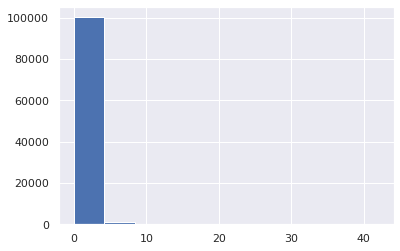

In [32]:
print(plt.hist(df_cont['number_outpatient'],bins=10))

(array([1.0156e+05, 1.6800e+02, 2.6000e+01, 5.0000e+00, 1.0000e+00,
       1.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00]), array([ 0. ,  7.6, 15.2, 22.8, 30.4, 38. , 45.6, 53.2, 60.8, 68.4, 76. ]), <a list of 10 Patch objects>)


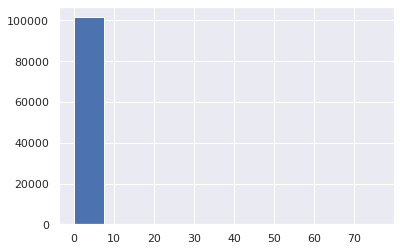

In [33]:
print(plt.hist(df_cont['number_emergency'],bins=10))
#print(plt.hist(df_cont['number_inpatient'],bins=10))



### crear variables dummy en caso que sea conveniente

In [85]:
# get_dummies 

df_null_dum = pd.get_dummies(df_null, columns=['gender','race', 'age', 'diabetesmed'], drop_first=True)

print('Dimensión df_null con dummies:','\n')
print(df_null_dum.shape,'\n')
print(df_null_dum.columns,'\n')
df_null_dum.head()  


Dimensión df_null con dummies: 

(101766, 46) 

Index(['encounter_id', 'patient_nbr', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'a1cresult', 'metformin', 'glipizide', 'glyburide',
       'insulin', 'glyburide_metformin', 'metformin_pioglitazone', 'change',
       'readmitted', 'admission_source_descrip', 'admission_type_descrip',
       'discharge_disposition_descrip', 'gender_Male',
       'gender_Unknown/Invalid', 'race_Asian', 'race_Caucasian',
       'race_Hispanic', 'race_Other', 'age_[10-20)', 'age_[20-30)',
       'age_[30-40)', 'age_[40-50)', 'age_[50-60)', 'age_[60-70)',
       'age_[70-80)', 'age_[80-90)', 'age_[90-100)', 'diabetesmed_Yes'],
      dtype='object') 



,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,a1cresult,metformin,glipizide,glyburide,insulin,glyburide_metformin,metformin_pioglitazone,change,readmitted,admission_source_descrip,admission_type_descrip,discharge_disposition_descrip,gender_Male,gender_Unknown/Invalid,race_Asian,race_Caucasian,race_Hispanic,race_Other,age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),diabetesmed_Yes
0,2278392,8222157,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,No,No,No,No,No,No,No,NO,Physician Referral,None,Not Mapped,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,149190,55629189,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,No,No,No,Up,No,No,Ch,>30,Emergency Room,Emergency,Discharged to home,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
2,64410,86047875,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,No,Steady,No,No,No,No,No,NO,Emergency Room,Emergency,Discharged to home,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,500364,82442376,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,No,No,No,Up,No,No,Ch,NO,Emergency Room,Emergency,Discharged to home,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
4,16680,42519267,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,No,Steady,No,Steady,No,No,Ch,NO,Emergency Room,Emergency,Discharged to home,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1




### estudiar que todas las variables ahora sí tengan el formato y contenido adecuado. si todavía no, arreglarlas.

In [86]:
# Modificar variable objetivo y variables continuas que son outliers

# np.where(df.col == 1, 1,0)

# 'number_outpatient', 'number_emergency', 'number_inpatient'

df_null_dum['number_outpatient'] = np.where(df_null_dum['number_outpatient'] == 0, 0, 1)
df_null_dum['number_outpatient']

df_null_dum['number_emergency'] = np.where(df_null_dum['number_emergency'] == 0, 0, 1)
df_null_dum['number_emergency']

df_null_dum['number_inpatient'] = np.where(df_null_dum['number_inpatient'] == 0, 0, 1)
df_null_dum['number_inpatient']

df_null_dum['readmitted'] = np.where(df_null_dum['readmitted'] == "NO", 0, 1)
df_null_dum['readmitted']

print('Dimensión df_null con variables dummy:','\n')
print(df_null_dum.shape,'\n')
print(df_null_dum.dtypes,'\n')

df_null_dum.head()  

Dimensión df_null con variables dummy: 

(101766, 46) 

encounter_id                     int64 
patient_nbr                      int64 
admission_type_id                int64 
discharge_disposition_id         int64 
admission_source_id              int64 
time_in_hospital                 int64 
payer_code                       object
medical_specialty                object
num_lab_procedures               int64 
num_procedures                   int64 
num_medications                  int64 
number_outpatient                int64 
number_emergency                 int64 
number_inpatient                 int64 
diag_1                           object
diag_2                           object
diag_3                           object
number_diagnoses                 int64 
a1cresult                        object
metformin                        object
glipizide                        object
glyburide                        object
insulin                          object
glyburide_metformin     

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,a1cresult,metformin,glipizide,glyburide,insulin,glyburide_metformin,metformin_pioglitazone,change,readmitted,admission_source_descrip,admission_type_descrip,discharge_disposition_descrip,gender_Male,gender_Unknown/Invalid,race_Asian,race_Caucasian,race_Hispanic,race_Other,age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),diabetesmed_Yes
0,2278392,8222157,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,No,No,No,No,No,No,No,0,Physician Referral,None,Not Mapped,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,149190,55629189,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,No,No,No,Up,No,No,Ch,1,Emergency Room,Emergency,Discharged to home,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
2,64410,86047875,1,1,7,2,NaN,NaN,11,5,13,1,0,1,648,250,V27,6,None,No,Steady,No,No,No,No,No,0,Emergency Room,Emergency,Discharged to home,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,500364,82442376,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,No,No,No,Up,No,No,Ch,0,Emergency Room,Emergency,Discharged to home,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
4,16680,42519267,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,No,Steady,No,Steady,No,No,Ch,0,Emergency Room,Emergency,Discharged to home,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1


In [38]:
#df_null_dum.columns

Index(['encounter_id', 'patient_nbr', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'a1cresult', 'metformin', 'glipizide', 'glyburide',
       'insulin', 'glyburide_metformin', 'metformin_pioglitazone', 'change',
       'readmitted', 'admission_source_descrip', 'admission_type_descrip',
       'discharge_disposition_descrip', 'gender_Female', 'gender_Male',
       'gender_Unknown/Invalid', 'race_AfricanAmerican', 'race_Asian',
       'race_Caucasian', 'race_Hispanic', 'race_Other', 'age_[0-10)',
       'age_[10-20)', 'age_[20-30)', 'age_[30-40)', 'age_[40-50)',
       'age_[50-60)', 'age_[60-70)', 'age_[70-80)', 'age_[80-90)',
       'age_[90-100)', 'diabetesmed_No', 'diabetesmed_Yes'],
      dtype='objec



### antes de estudiar el comportamiento de las variables, veremos si hay alguna variable derivada a crear



# Exploratory Data Analysis



### crear la matriz de correlación

In [87]:
correlacion = df_null_dum.corr()
correlacion

correlacion2 = df_cont.corr()
correlacion2


#for i in correlacion:
  #if correlacion[i] > 0.3
#  print((correlacion[i].sort_values(ascending=False))[:10], '\n')  

#df_numerical_most_corr = df_numerical_corr[abs(df_numerical_corr) > 0.5].sort_values(ascending=False)
#df_numerical_most_corr

# df = pd.merge(diabetes_j2, discharge_disposition, on=['discharge_disposition_id'], how='left')


,encounter_id,patient_nbr,admission_type_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
encounter_id,1.000000,0.512028,-0.158961,-0.112402,-0.062221,-0.026062,-0.014225,0.076113,0.103756,0.082803,0.030962,0.265149
patient_nbr,0.512028,1.000000,-0.011128,-0.032568,-0.024092,0.015946,-0.015570,0.020665,0.103379,0.062352,0.012480,0.226847
admission_type_id,-0.158961,-0.011128,1.000000,0.106654,-0.012500,-0.143713,0.129888,0.079535,0.026511,-0.019116,-0.038161,-0.117126
admission_source_id,-0.112402,-0.032568,0.106654,1.000000,-0.006965,0.048885,-0.135400,-0.054533,0.027244,0.059892,0.036314,0.072114
time_in_hospital,-0.062221,-0.024092,-0.012500,-0.006965,1.000000,0.318450,0.191472,0.466135,-0.008916,-0.009681,0.073623,0.220186
num_lab_procedures,-0.026062,0.015946,-0.143713,0.048885,0.318450,1.000000,0.058066,0.268161,-0.007602,-0.002279,0.039231,0.152773
num_procedures,-0.014225,-0.015570,0.129888,-0.135400,0.191472,0.058066,1.000000,0.385767,-0.024819,-0.038179,-0.066236,0.073734
num_medications,0.076113,0.020665,0.079535,-0.054533,0.466135,0.268161,0.385767,1.000000,0.045197,0.013180,0.064194,0.261526
number_outpatient,0.103756,0.103379,0.026511,0.027244,-0.008916,-0.007602,-0.024819,0.045197,1.000000,0.091459,0.107338,0.094152
number_emergency,0.082803,0.062352,-0.019116,0.059892,-0.009681,-0.002279,-0.038179,0.013180,0.091459,1.000000,0.266559,0.055539





### pintar la matriz de correlación

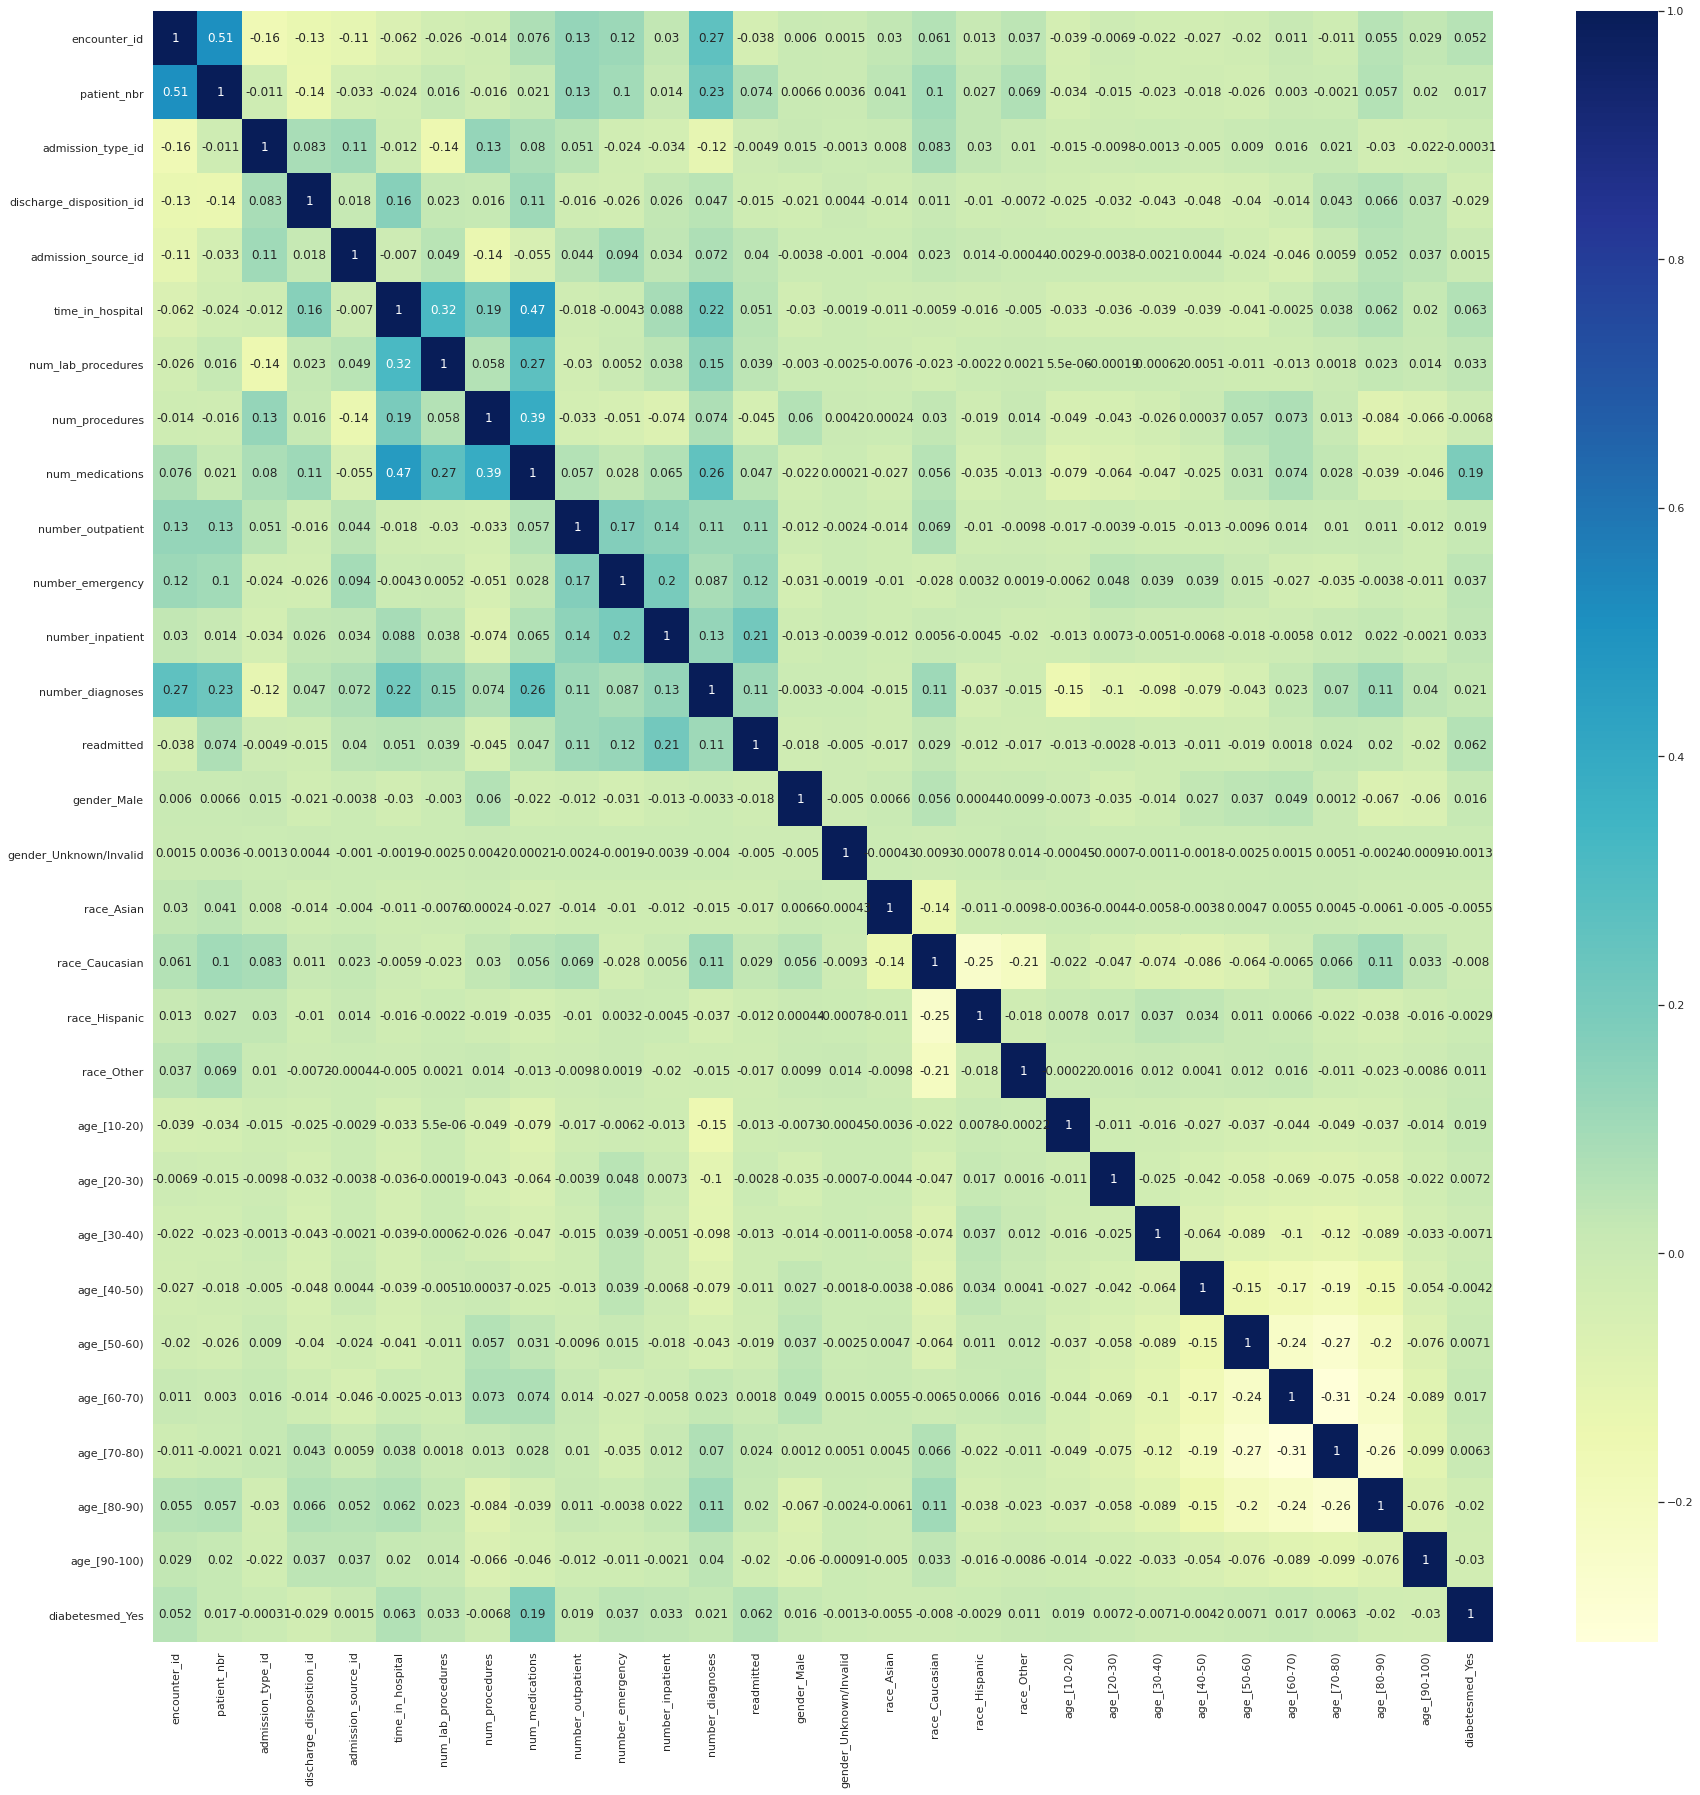

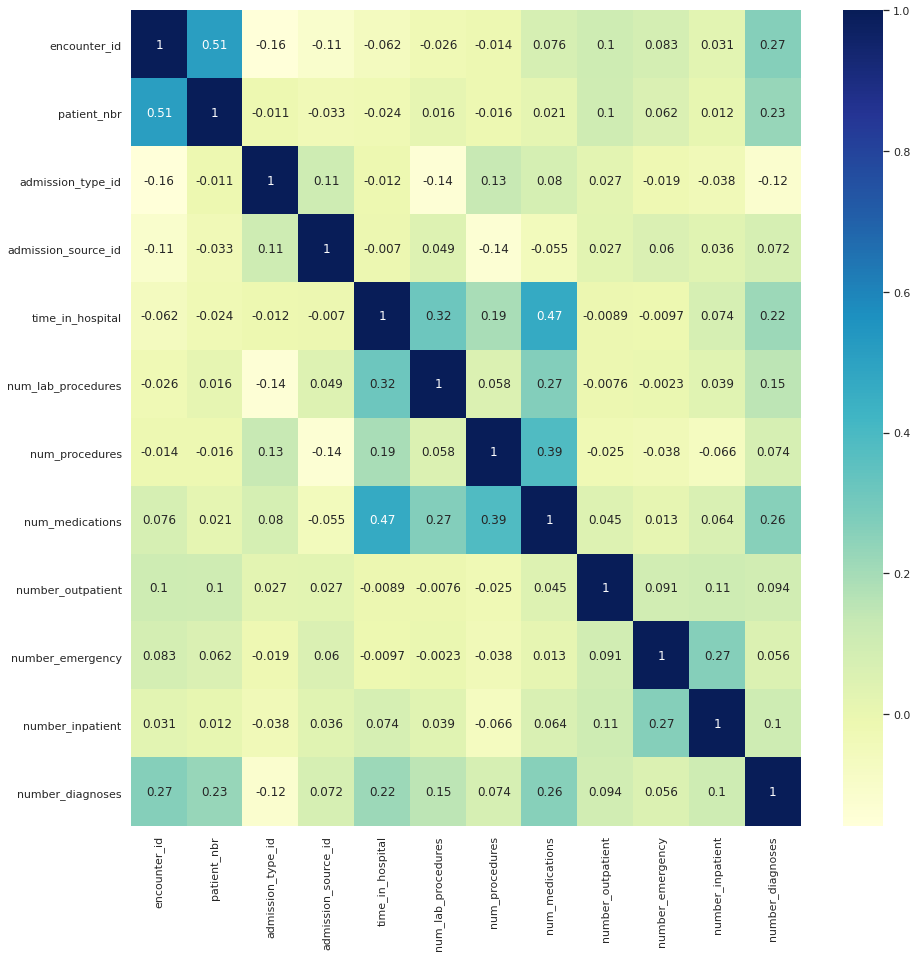

In [88]:
plt.figure(figsize=(30,30))
sns.heatmap(correlacion, cmap="YlGnBu" ,annot=True)
plt.show()

plt.figure(figsize=(15,15))
sns.heatmap(correlacion2, cmap="YlGnBu" ,annot=True)
plt.show()


# cmap="YlGnBu" -->  https://seaborn.pydata.org/generated/seaborn.heatmap.html
#for idx in df_numerical_most_corr.index:
#    df.plot(kind='scatter',
#          x=idx,
#          y='SalePrice')



### determinar qué par de variables están correlacionadas

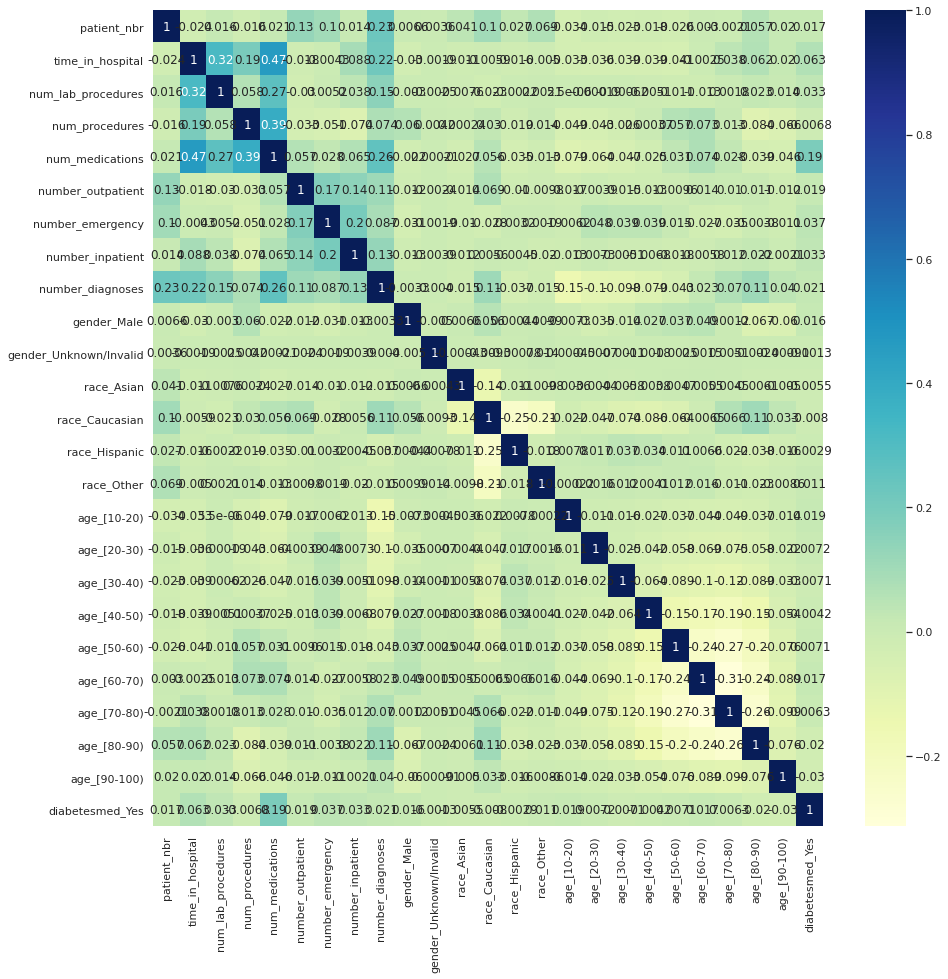

In [116]:
modelar = df_null_dum.drop(['readmitted', 'encounter_id', 'admission_type_id', 
                            'discharge_disposition_id', 'admission_source_id'], axis=1)
modelar

modelar.dtypes
mode1 = modelar.select_dtypes('int64')
mode2= modelar.select_dtypes('uint8')

df_x = pd.concat([mode1, mode2], axis=1,)


correlacion3 = df_x.corr()
correlacion3

plt.figure(figsize=(15,15))
sns.heatmap(correlacion3, cmap="YlGnBu" ,annot=True)
plt.show()



### estudiar los pares de variables correlacionadas para quedarse solamente con una del par



# Modelado



### seleccionar variables

In [98]:
# Df: df_null_dum  | df_cont

# Eliminar variable objetivo y quedarno con las continuas y dummies

#df_x = df_null.select_dtypes('int64')

modelar = df_null_dum.drop(['readmitted', 'encounter_id', 'admission_type_id', 
                            'discharge_disposition_id', 'admission_source_id'], axis=1)
modelar

modelar.dtypes
mode1 = modelar.select_dtypes('int64')
mode2= modelar.select_dtypes('uint8')

df_x = pd.concat([mode1, mode2], axis=1,)

print('Dimensión Df vbles continuas:','\n')
print(df_x.shape,'\n')
print(df_x.columns,'\n')
df_x.head()


Dimensión Df vbles continuas: 

(101766, 25) 

Index(['patient_nbr', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses',
       'gender_Male', 'gender_Unknown/Invalid', 'race_Asian', 'race_Caucasian',
       'race_Hispanic', 'race_Other', 'age_[10-20)', 'age_[20-30)',
       'age_[30-40)', 'age_[40-50)', 'age_[50-60)', 'age_[60-70)',
       'age_[70-80)', 'age_[80-90)', 'age_[90-100)', 'diabetesmed_Yes'],
      dtype='object') 



,patient_nbr,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,gender_Male,gender_Unknown/Invalid,race_Asian,race_Caucasian,race_Hispanic,race_Other,age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),diabetesmed_Yes
0,8222157,1,41,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,55629189,3,59,0,18,0,0,0,9,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
2,86047875,2,11,5,13,1,0,1,6,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,82442376,2,44,1,16,0,0,0,7,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
4,42519267,1,51,0,8,0,0,0,5,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1


In [70]:
df_null_dum.head()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,a1cresult,metformin,glipizide,glyburide,insulin,glyburide_metformin,metformin_pioglitazone,change,readmitted,admission_source_descrip,admission_type_descrip,discharge_disposition_descrip,gender_Male,gender_Unknown/Invalid,race_Asian,race_Caucasian,race_Hispanic,race_Other,age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),diabetesmed_Yes
0,2278392,8222157,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,No,No,No,No,No,No,No,0,Physician Referral,None,Not Mapped,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,149190,55629189,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,No,No,No,Up,No,No,Ch,0,Emergency Room,Emergency,Discharged to home,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
2,64410,86047875,1,1,7,2,NaN,NaN,11,5,13,1,0,1,648,250,V27,6,None,No,Steady,No,No,No,No,No,0,Emergency Room,Emergency,Discharged to home,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,500364,82442376,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,No,No,No,Up,No,No,Ch,0,Emergency Room,Emergency,Discharged to home,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
4,16680,42519267,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,No,Steady,No,Steady,No,No,Ch,0,Emergency Room,Emergency,Discharged to home,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1


In [124]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  roc_curve, auc, recall_score, precision_score, confusion_matrix, make_scorer, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier


# Arbol de Decisión   -  Df: df_null_dum  | df_cont
# Df: df_null_dum  | df_cont

X, y = df_x , df_null_dum['readmitted']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 50)

arbol = DecisionTreeClassifier( "gini", max_depth=7)
arbol.fit(X_train, y_train)

#arbol.score(X_train, y_train)
#arbol.score(X_test, y_test)

#arbol.predict(X_train)
#arbol.predict(X_test)

#classification_report(y_train, arbol.predict(X_train))
#classification_report(y_test, arbol.predict(X_test))

for i in [1,3,5,6,7,10,12,14,20,50]:
    arbol = DecisionTreeClassifier(max_depth=i)
    arbol.fit(X_train, y_train)
    print('El score para %(arboles)f arboles es %(resultado)f' % {'arboles':i,'resultado':arbol.score(X_test, y_test)})

pd.crosstab(index=arbol.predict(X),
            columns=df_null_dum['readmitted'], margins=True)

El score para 1.000000 arboles es 0.617090
El score para 3.000000 arboles es 0.616893
El score para 5.000000 arboles es 0.619527
El score para 6.000000 arboles es 0.619998
El score para 7.000000 arboles es 0.621649
El score para 10.000000 arboles es 0.619448
El score para 12.000000 arboles es 0.615557
El score para 14.000000 arboles es 0.601093
El score para 20.000000 arboles es 0.575741
El score para 50.000000 arboles es 0.558211


readmitted,0,1,All
row_0,,,
0,49172,5548,54720
1,5692,41354,47046
All,54864,46902,101766




### estandarizar variables

In [ ]:
# Estandarizar y normalizar 



### lanzar distintos algoritmos

In [104]:
# Regresión Logistica   

classifier = LogisticRegression()

classifier.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [109]:
prediction_tt = classifier.predict(X_test)
prediction_tr = classifier.predict(X_train)

print(prediction_tt, prediction_tr )

[0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0]


In [122]:
accurancy_tt = np.mean(prediction_tt == y_test)
accurancy_tr = np.mean(prediction_tr == y_train)

print(accurancy_tt,accurancy_tr)

#classifier.score(X_test, y_test)

0.5385582894426538 0.5393061160316546


In [114]:
# Modelo - KNN 

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)


0.5621806461756151

In [115]:
# Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier

param_grid = {'learning_rate': [0.01, 0.1, 0.5, 1],
              'max_depth': [5,7,9]}

grid = GridSearchCV(GradientBoostingClassifier(), param_grid=param_grid, cv=3, verbose=2)
grid.fit(X_train, y_train)

print('Best score for GradientBoostingClassifier: {}'.format(grid.score(X_test, y_test)), '\n')
print('Best parameters for GradientBoostingClassifier: {}'.format(grid.best_params_), '\n')


grid.score(X_test, y_test)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] learning_rate=0.01, max_depth=5 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................. learning_rate=0.01, max_depth=5, total=  12.9s
[CV] learning_rate=0.01, max_depth=5 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.9s remaining:    0.0s


[CV] .................. learning_rate=0.01, max_depth=5, total=  12.9s
[CV] learning_rate=0.01, max_depth=5 .................................
[CV] .................. learning_rate=0.01, max_depth=5, total=  12.9s
[CV] learning_rate=0.01, max_depth=7 .................................
[CV] .................. learning_rate=0.01, max_depth=7, total=  17.9s
[CV] learning_rate=0.01, max_depth=7 .................................
[CV] .................. learning_rate=0.01, max_depth=7, total=  17.9s
[CV] learning_rate=0.01, max_depth=7 .................................
[CV] .................. learning_rate=0.01, max_depth=7, total=  17.9s
[CV] learning_rate=0.01, max_depth=9 .................................
[CV] .................. learning_rate=0.01, max_depth=9, total=  24.0s
[CV] learning_rate=0.01, max_depth=9 .................................
[CV] .................. learning_rate=0.01, max_depth=9, total=  23.9s
[CV] learning_rate=0.01, max_depth=9 .................................
[CV] .

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 10.8min finished


Best score for GradientBoostingClassifier: 0.6358383774860467 

Best parameters for GradientBoostingClassifier: {'learning_rate': 0.1, 'max_depth': 5} 



0.6358383774860467



### evaluar los algoritmos para determinar cuál es el que mejor

In [129]:
from sklearn.metrics import f1_score, precision_score, recall_score

#print('Precision:', precision_score(y_test, prediction))
#print('Recall:   ', recall_score(y_test, prediction))
#print('Fscore:   ', f1_score(y_test, prediction))


print('El modelo de arbol de clasificacion tiene una precisión de:   ' + '62,13%')# str(calculate_metrics(results, target_name, "arbol")))
print('El modelo de regresión logística tiene una precisión de:   ' + '53,85%' )#str(calculate_metrics(results, target_name, "classifier")))
print('El modelo de KNN tiene una precisión de:    ' + '56,21%')#str(calculate_metrics(results, target_name, "knn")))
print('El modelo de Gradient Boosting tiene una precisión de:    ' + '63.58%') #str(calculate_metrics(results, target_name, "grid")))


El modelo de arbol de clasificacion tiene una precisión de:   62,13%
El modelo de regresión logística tiene una precisión de:   53,85%
El modelo de KNN tiene una precisión de:    56,21%
El modelo de Gradient Boosting tiene una precisión de:    63.58%




# EXTRA



### hacer un clustering de aquellos pacientes que por lo menos han sido readmitidos una vez 